In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankfullcsv/bank-full.csv


## 1. Data processing

In [2]:
df = pd.read_csv('/kaggle/input/bankfullcsv/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


There are no nulls in the data, however some values are missing- they have the status 'unknown'. Let's take a look at this.

In [3]:
cat_cols = df.select_dtypes(exclude=['number']).columns
df[cat_cols] = df[cat_cols].replace('unknown', np.nan)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


Percentage of missing values per columns:

In [4]:
df.isna().sum()/len(df)*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are too many missing values in 'poutcome' and 'contact'- we'll drop these columns for now.

We can fill the missing values in the remaining columns by taking the most common value.

In [6]:
df.drop('contact', axis=1, inplace=True)
df.drop('poutcome', axis=1, inplace=True)

In [7]:
df['job'] = df['job'].fillna(df['job'].value_counts().idxmax())
df['education'] = df['education'].fillna(df['job'].value_counts().idxmax())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Change yes/no to 1/0:

In [9]:
yes_no_cols = ['default', 'housing', 'loan', 'Target']
df[yes_no_cols] = df[yes_no_cols].replace('yes', 1)
df[yes_no_cols] = df[yes_no_cols].replace('no', 0)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,blue-collar,0,1506,1,0,5,may,92,1,-1,0,0
4,33,blue-collar,single,blue-collar,0,1,0,0,5,may,198,1,-1,0,0


Change month names to numbers:

In [10]:
dictionary = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12 }
df['month'] = df['month'].map(dictionary)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,0,2143,1,0,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,5,76,1,-1,0,0
3,47,blue-collar,married,blue-collar,0,1506,1,0,5,5,92,1,-1,0,0
4,33,blue-collar,single,blue-collar,0,1,0,0,5,5,198,1,-1,0,0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Target', ylabel='count'>

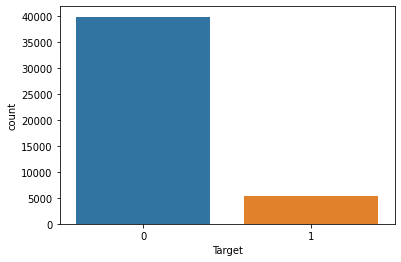

In [12]:
sns.countplot(x='Target', data=df)

The plot above shows that there is a high class imbalance.

**important:** This has to be taken into account during the models' evaluation phase.

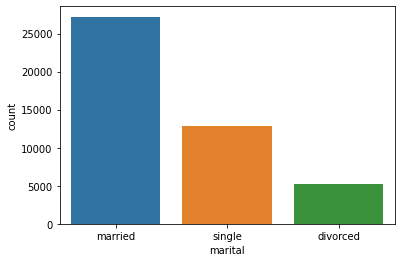

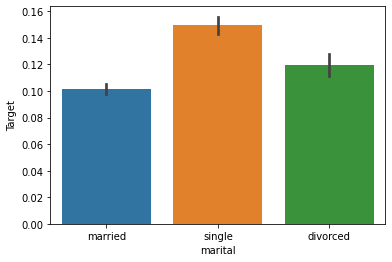

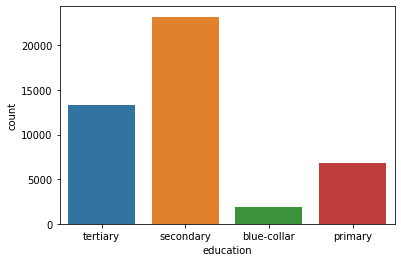

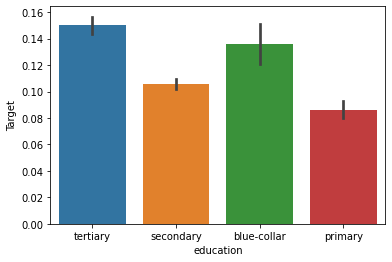

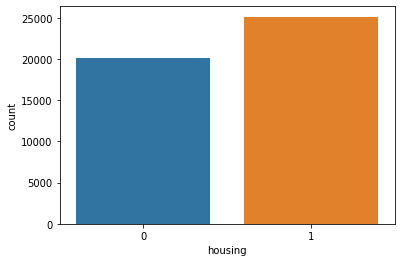

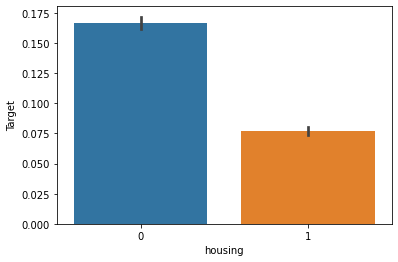

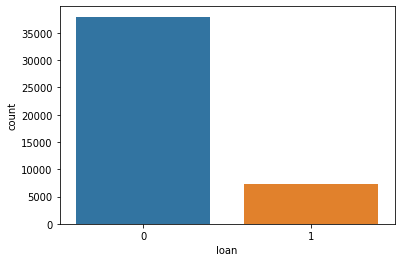

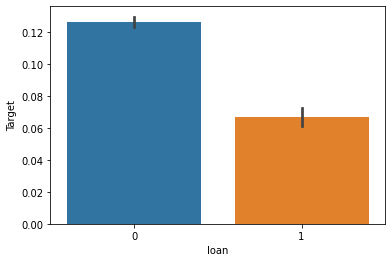

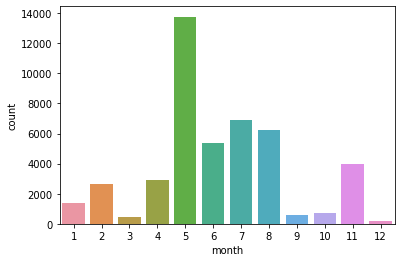

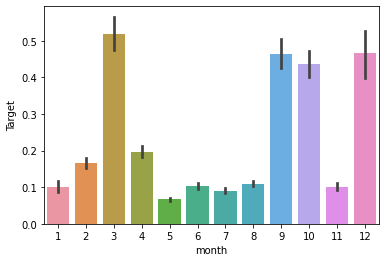

In [13]:
interesting_cols=['marital', 'education', 'housing', 'loan', 'month']

for col in interesting_cols:
    sns.countplot(x=col, data=df)
    plt.show()
    sns.barplot(x=col, y='Target', data=df)
    plt.show()

## 2.Building pipelines

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['Target'], test_size=0.20, random_state=42)
y_train.head()

3344     0
17965    0
18299    0
10221    0
32192    1
Name: Target, dtype: int64

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   day        45211 non-null  int64 
 9   month      45211 non-null  int64 
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 5.2+ MB


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['age', 'default', 'balance', 'housing', 'loan',
                                              'day', 'month', 'duration', 'campaign', 'pdays', 'previous' ])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [18]:
num_pipeline.fit_transform(X_train)

array([[ 4.100e+01,  0.000e+00,  8.490e+02, ...,  1.000e+00, -1.000e+00,
         0.000e+00],
       [ 4.900e+01,  0.000e+00,  1.415e+03, ...,  2.000e+00, -1.000e+00,
         0.000e+00],
       [ 4.200e+01,  0.000e+00,  3.842e+03, ...,  4.000e+00, -1.000e+00,
         0.000e+00],
       ...,
       [ 3.400e+01,  0.000e+00,  1.317e+03, ...,  1.000e+00, -1.000e+00,
         0.000e+00],
       [ 3.300e+01,  0.000e+00,  1.650e+02, ...,  1.000e+00, -1.000e+00,
         0.000e+00],
       [ 3.800e+01,  0.000e+00, -4.100e+01, ...,  1.000e+01, -1.000e+00,
         0.000e+00]])

In [19]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [20]:
# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['job', 'marital', 'education'])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [21]:
cat_pipeline.fit_transform(X_train)

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [22]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [23]:
preprocess_pipeline.fit_transform(X_train)[0]

array([ 41.,   0., 849.,   1.,   0.,  15.,   5.,  72.,   1.,  -1.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   1.,   0.,   0.])

## 3. Preparing models

In [24]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### SVC linear

In [26]:
# pipe = Pipeline([
#     ('preprocessing', preprocess_pipeline), 
#     ('classifier', SVC(kernel='linear'))])


# param_grid = {
#             'classifier__C': [0.1]
# }

# grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

# grid_1.fit(X_train, y_train)
# grid_1.best_params_

### SVC poly

In [27]:
# pipe = Pipeline([
#     ('preprocessing', preprocess_pipeline),
#     ('classifier', SVC(kernel='poly'))])

# param_grid = {
#             'classifier__C': [0.1]
# }

# grid_2 = GridSearchCV(pipe, param_grid, cv=kfold)

# grid_2.fit(X_train, y_train)
# grid_2.best_params_

### Logistic Regression

In [41]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())])

param_grid = {
            'classifier__C': [0.1]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_3.fit(X_train, y_train)
grid_3.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'classifier__C': 0.1}

### Random Forests

In [37]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier(random_state=420))])

param_grid = {           
    'classifier__n_estimators': [100,200,400,500],
    'classifier__max_depth': [10,15]
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
    
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 15, 'classifier__n_estimators': 200}

In [38]:
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', MLPClassifier())])

param_grid = {
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001],#, 0.01, 0.1],
            'classifier__max_iter': [100],
            'classifier__batch_size': [8, 16,32],
}

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 100}

## 4. Models estimation

In [42]:
from sklearn import  metrics


models = []
# models.append(('SVM linear', grid_1.best_estimator_))
# models.append(('SVM poly', grid_2.best_estimator_))
models.append(('Logistic regression', grid_3.best_estimator_))
models.append(('Random forest', grid_4.best_estimator_))
models.append(('MLP Classifier', grid_5.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

Logistic regression
precision_score: 0.5502793296089385
recall_score: 0.18056828597616864
f1_score: 0.27191166321601107
accuracy_score: 0.8833351763795201
Random forest
precision_score: 0.6423487544483986
recall_score: 0.3308890925756187
f1_score: 0.4367816091954023
accuracy_score: 0.8970474400088466
MLP Classifier
precision_score: 0.5583864118895966
recall_score: 0.24106324472960586
f1_score: 0.3367477592829705
accuracy_score: 0.8854362490324007


In [43]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic regression','Random forest', 'MLP Classifier'])
print(df)

                Method  precision_score  recall_score  f1_score  \
0  Logistic regression         0.550279      0.180568  0.271912   
1        Random forest         0.642349      0.330889  0.436782   
2       MLP Classifier         0.558386      0.241063  0.336748   

   accuracy_score  
0        0.883335  
1        0.897047  
2        0.885436  
